##  **1. Introduction** 

Ini Inroduction Final Project

## **2. Import Libraries** 

In [1]:
#import libraries 
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.pylab import rcParams

from scipy.stats import boxcox
rcParams['figure.figsize']=10,6

## **3. Data Loading** 

In [2]:
df= pd.read_csv('Ashmore Dana Obligasi Nusantara.csv')

In [3]:
df

,Date,Price,Open,High,Low,Change %
0,"Dec 11, 2022","1,546.990","1,541.710","1,546.990","1,541.710",0.38%
1,"Dec 04, 2022","1,541.140","1,543.320","1,543.320","1,539.380",-0.23%
2,"Nov 27, 2022","1,544.760","1,531.230","1,544.760","1,531.230",1.05%
3,"Nov 20, 2022","1,528.710","1,517.840","1,528.710","1,517.840",0.67%
4,"Nov 13, 2022","1,518.520","1,513.310","1,518.580","1,513.310",0.80%
...,...,...,...,...,...,...
303,"Jan 29, 2017","1,193.960","1,193.960","1,193.960","1,193.960",-0.11%
304,"Jan 22, 2017","1,195.290","1,195.290","1,195.290","1,195.290",-0.18%
305,"Jan 15, 2017","1,197.450","1,197.450","1,197.450","1,197.450",0.10%
306,"Jan 08, 2017","1,196.220","1,196.220","1,196.220","1,196.220",0.56%


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      308 non-null    object
 1   Price     308 non-null    object
 2   Open      308 non-null    object
 3   High      308 non-null    object
 4   Low       308 non-null    object
 5   Change %  308 non-null    object
dtypes: object(6)
memory usage: 14.6+ KB


In [5]:
col = ['Price',	'Open',	'High',	'Low']

for i in col:

    df[i] = (df[i]
                # .str.replace(".","")
                .str.replace(",","")
                .astype(float)
                )

df['Change %'] = (df['Change %']
                .str.replace("%"," ")
                # .str.replace(",",".")
                .astype(float)
                )

df["Date"] = pd.to_datetime(df["Date"])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      308 non-null    datetime64[ns]
 1   Price     308 non-null    float64       
 2   Open      308 non-null    float64       
 3   High      308 non-null    float64       
 4   Low       308 non-null    float64       
 5   Change %  308 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 14.6 KB


In [7]:
df

,Date,Price,Open,High,Low,Change %
0,2022-12-11,1546.99,1541.71,1546.99,1541.71,0.38
1,2022-12-04,1541.14,1543.32,1543.32,1539.38,-0.23
2,2022-11-27,1544.76,1531.23,1544.76,1531.23,1.05
3,2022-11-20,1528.71,1517.84,1528.71,1517.84,0.67
4,2022-11-13,1518.52,1513.31,1518.58,1513.31,0.80
...,...,...,...,...,...,...
303,2017-01-29,1193.96,1193.96,1193.96,1193.96,-0.11
304,2017-01-22,1195.29,1195.29,1195.29,1195.29,-0.18
305,2017-01-15,1197.45,1197.45,1197.45,1197.45,0.10
306,2017-01-08,1196.22,1196.22,1196.22,1196.22,0.56


## **4. EDA (Exploratory Data Analysis)**

Text(0.5, 1.0, 'Plotting Price against the Entire Timeframe For all the columns')

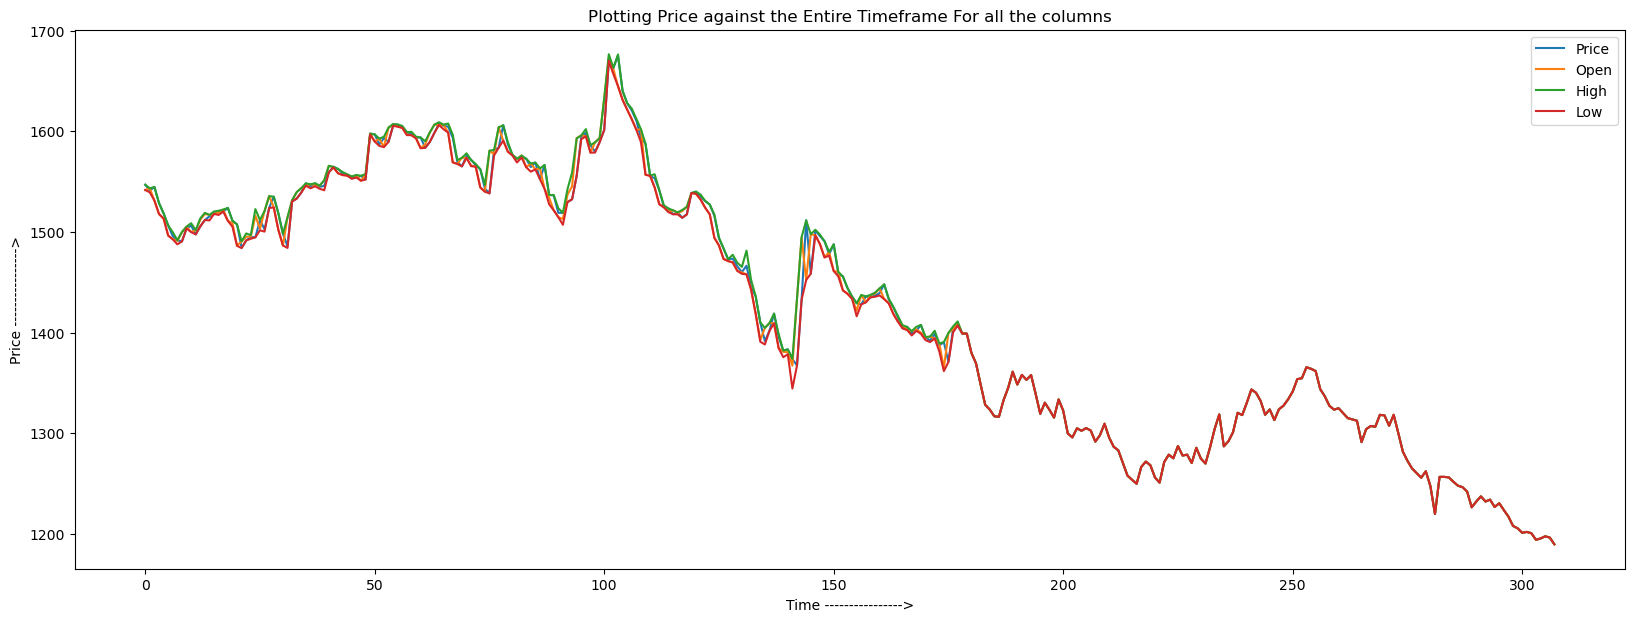

In [8]:
df[['Price','Open',	'High',	'Low']].plot(figsize=(20,7))
plt.legend(loc="best")
plt.xlabel("Time ---------------->")
plt.ylabel("Price ---------------->")
plt.title("Plotting Price against the Entire Timeframe For all the columns")

In [9]:
df = df.sort_values(['Date'],ascending=True).reset_index()

In [10]:
df

,index,Date,Price,Open,High,Low,Change %
0,307,2017-01-01,1189.58,1189.58,1189.58,1189.58,0.61
1,306,2017-01-08,1196.22,1196.22,1196.22,1196.22,0.56
2,305,2017-01-15,1197.45,1197.45,1197.45,1197.45,0.10
3,304,2017-01-22,1195.29,1195.29,1195.29,1195.29,-0.18
4,303,2017-01-29,1193.96,1193.96,1193.96,1193.96,-0.11
...,...,...,...,...,...,...,...
303,4,2022-11-13,1518.52,1513.31,1518.58,1513.31,0.80
304,3,2022-11-20,1528.71,1517.84,1528.71,1517.84,0.67
305,2,2022-11-27,1544.76,1531.23,1544.76,1531.23,1.05
306,1,2022-12-04,1541.14,1543.32,1543.32,1539.38,-0.23


In [11]:
new_df=df[['Date','High','Low']]

In [12]:
new_df=new_df.set_index(['Date'])

In [13]:
new_df

,High,Low
Date,,
2017-01-01,1189.58,1189.58
2017-01-08,1196.22,1196.22
2017-01-15,1197.45,1197.45
2017-01-22,1195.29,1195.29
2017-01-29,1193.96,1193.96
...,...,...
2022-11-13,1518.58,1513.31
2022-11-20,1528.71,1517.84
2022-11-27,1544.76,1531.23


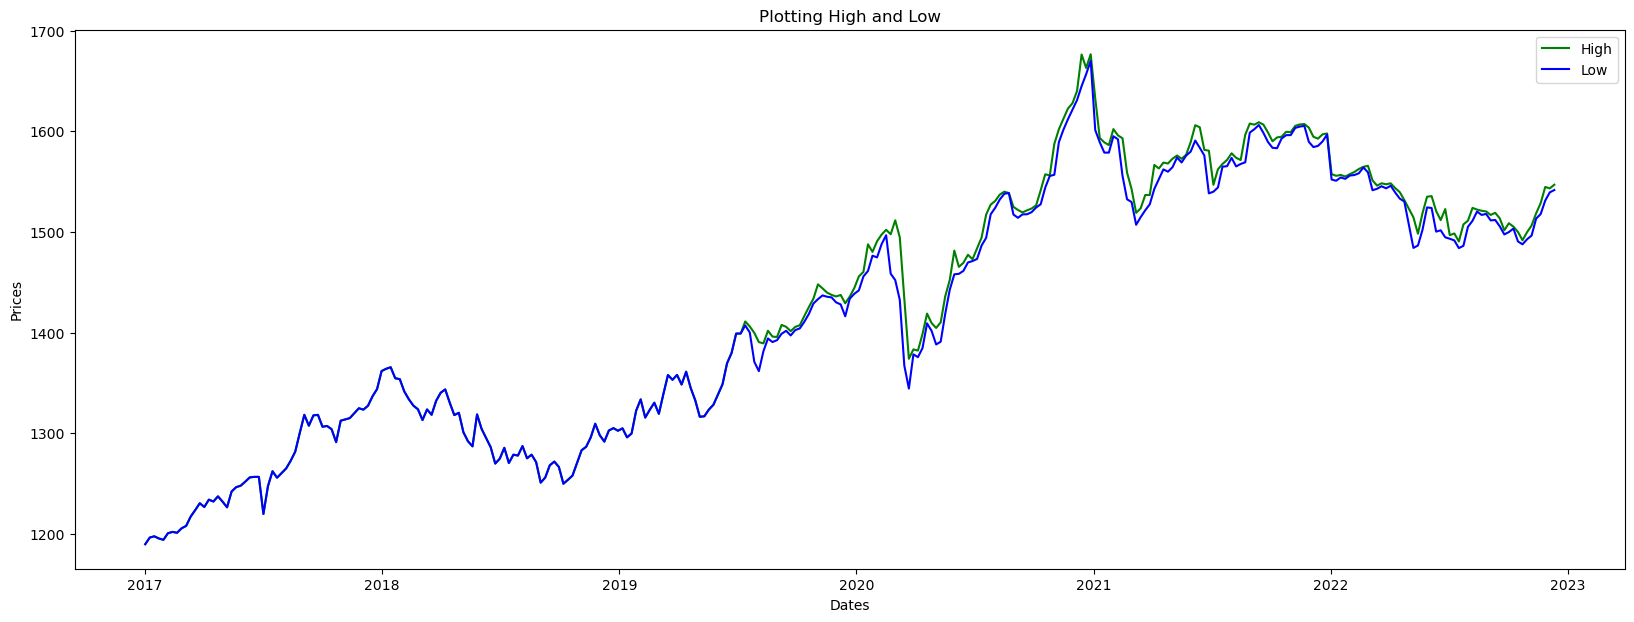

In [14]:
plt.figure(figsize=(20,7))
plt.plot(new_df['High'], color='green', label='High')
plt.plot(new_df['Low'], color='blue', label='Low')
plt.title('Plotting High and Low')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

## **5. Data Preprocessing**

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 1600x900 with 0 Axes>

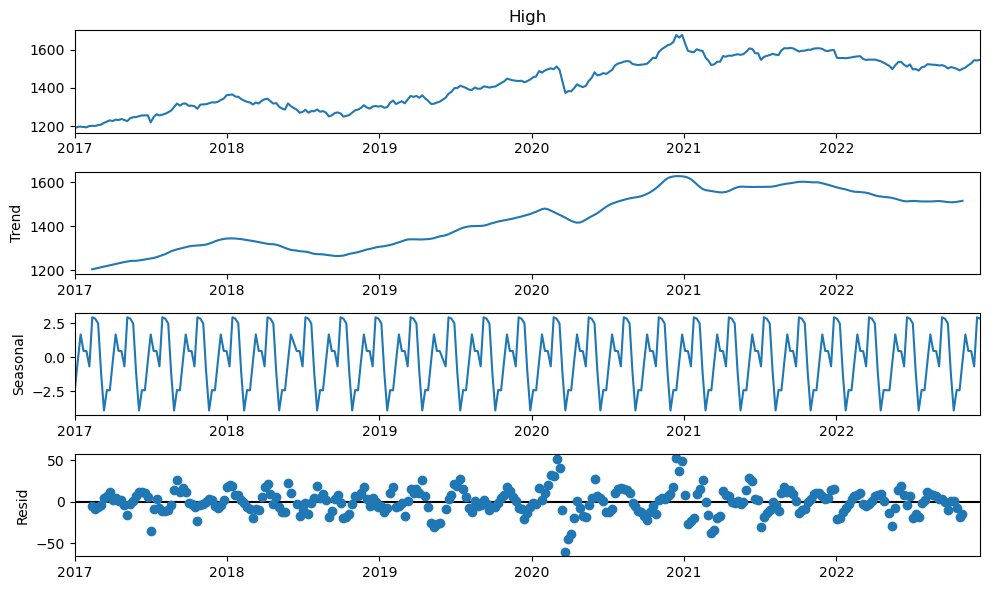

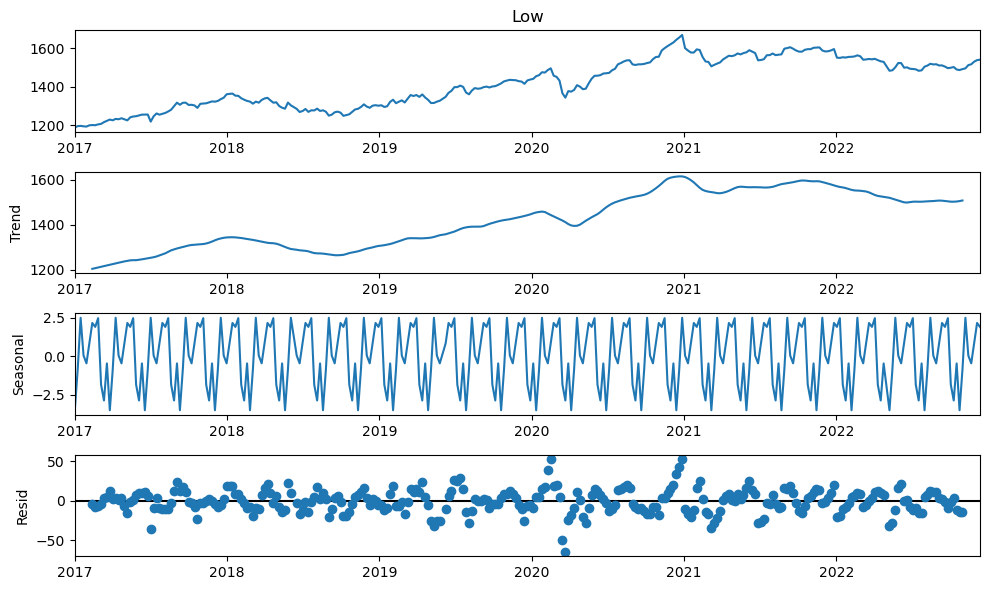

In [16]:
fig = plt.figure() 
fig.set_size_inches(16, 9)

result_H = seasonal_decompose(new_df['High'], period=12)
result_L = seasonal_decompose(new_df['Low'], period=12)
 
fig = result_H.plot() 
fig = result_L.plot() 

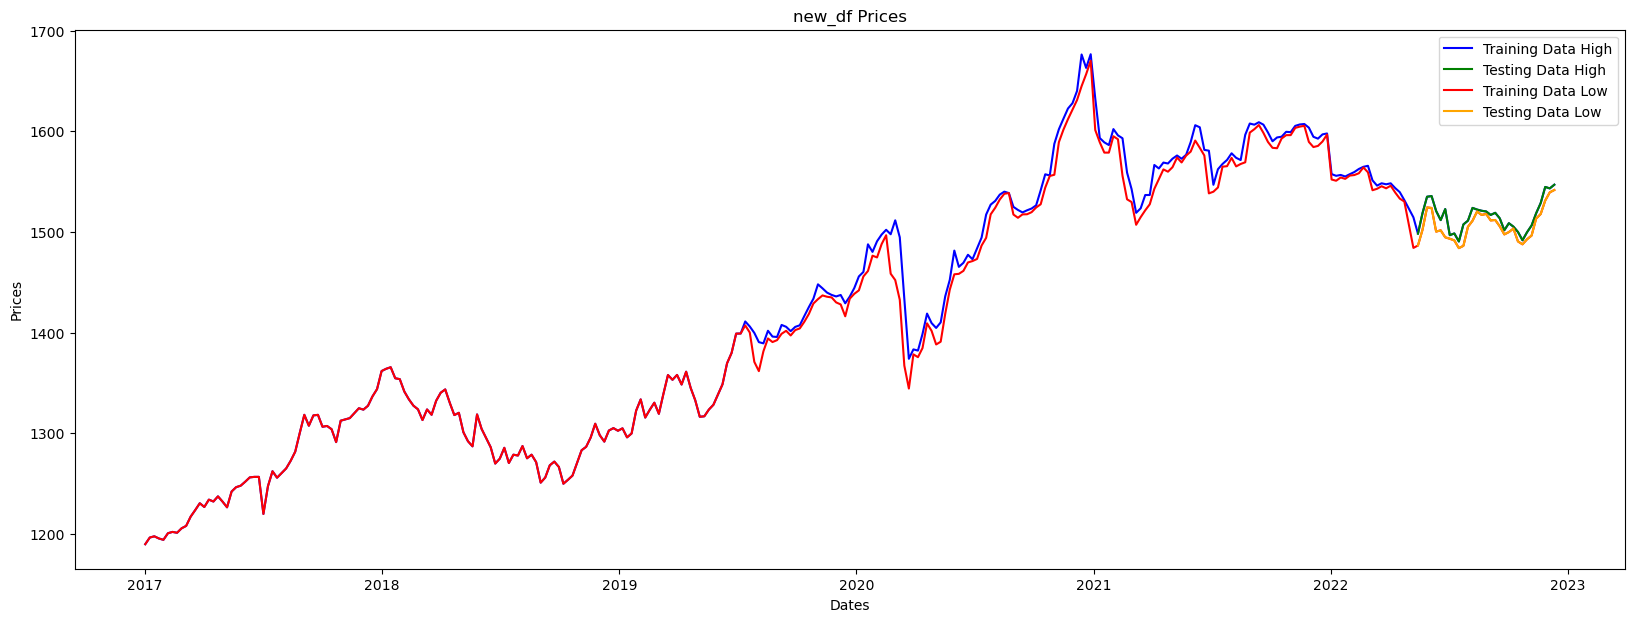

In [17]:
train_data, test_data = new_df[0:int(len(new_df)*0.9)], new_df[int(len(new_df)*0.9):]


plt.figure(figsize=(20,7))
plt.title('new_df Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(new_df['High'], 'blue', label='Training Data High')
plt.plot(test_data['High'], 'green', label='Testing Data High')
plt.plot(new_df['Low'], 'red', label='Training Data Low')
plt.plot(test_data['Low'], 'orange', label='Testing Data Low')
plt.legend()

In [18]:
train_data

,High,Low
Date,,
2017-01-01,1189.58,1189.58
2017-01-08,1196.22,1196.22
2017-01-15,1197.45,1197.45
2017-01-22,1195.29,1195.29
2017-01-29,1193.96,1193.96
...,...,...
2022-04-03,1548.37,1546.00
2022-04-10,1543.60,1539.18
2022-04-17,1539.58,1533.17


## **6. Modeling**

### **6.1 Model Definition**

We will use ARIMA for the time series prediction

### **6.2 Model Training**

In [19]:
from pmdarima.arima import auto_arima

model_autoARIMA_High = auto_arima(new_df['High'], start_p=0, d=1, start_q=0,
                                   max_p=5, max_d=5, max_q=5, start_P=0,
                                   D=1, start_Q=0, max_P=5, max_D=5,
                                   max_Q=5, m=4, seasonal=True,
                                   error_action='warn', trace=True,
                                   supress_warning=True, stepwise=True,
                                   random_state=420, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=2643.003, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=2541.056, Time=0.13 sec
 ARIMA(0,1,1)(0,1,1)[4]             : AIC=inf, Time=0.30 sec
 ARIMA(1,1,0)(0,1,0)[4]             : AIC=2629.402, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[4]             : AIC=2501.744, Time=0.15 sec
 ARIMA(1,1,0)(3,1,0)[4]             : AIC=2467.338, Time=0.22 sec
 ARIMA(1,1,0)(4,1,0)[4]             : AIC=2461.547, Time=0.32 sec
 ARIMA(1,1,0)(5,1,0)[4]             : AIC=2454.224, Time=0.39 sec
 ARIMA(1,1,0)(5,1,1)[4]             : AIC=inf, Time=1.68 sec
 ARIMA(1,1,0)(4,1,1)[4]             : AIC=inf, Time=1.31 sec
 ARIMA(0,1,0)(5,1,0)[4]             : AIC=2461.528, Time=0.29 sec
 ARIMA(2,1,0)(5,1,0)[4]             : AIC=2455.457, Time=0.42 sec
 ARIMA(1,1,1)(5,1,0)[4]             : AIC=2455.798, Time=0.46 sec
 ARIMA(0,1,1)(5,1,0)[4]             : AIC=2455.384, Time=0.45 sec
 ARIMA(2,1,1)(5,1,0)[4]             : AIC=2456.8

In [20]:
model_autoARIMA_Low = auto_arima(new_df['Low'], start_p=0, d=1, start_q=0,
                                   max_p=5, max_d=5, max_q=5, start_P=0,
                                   D=1, start_Q=0, max_P=5, max_D=5,
                                   max_Q=5, m=4, seasonal=True,
                                   error_action='warn', trace=True,
                                   supress_warning=True, stepwise=True,
                                   random_state=420, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=2652.574, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=2561.046, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[4]             : AIC=inf, Time=0.35 sec
 ARIMA(1,1,0)(0,1,0)[4]             : AIC=2642.591, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[4]             : AIC=2522.451, Time=0.16 sec
 ARIMA(1,1,0)(3,1,0)[4]             : AIC=2490.440, Time=0.37 sec
 ARIMA(1,1,0)(4,1,0)[4]             : AIC=2483.780, Time=0.29 sec
 ARIMA(1,1,0)(5,1,0)[4]             : AIC=2472.228, Time=0.40 sec
 ARIMA(1,1,0)(5,1,1)[4]             : AIC=inf, Time=1.75 sec
 ARIMA(1,1,0)(4,1,1)[4]             : AIC=inf, Time=1.41 sec
 ARIMA(0,1,0)(5,1,0)[4]             : AIC=2478.323, Time=0.27 sec
 ARIMA(2,1,0)(5,1,0)[4]             : AIC=2473.931, Time=0.41 sec
 ARIMA(1,1,1)(5,1,0)[4]             : AIC=2473.908, Time=0.57 sec
 ARIMA(0,1,1)(5,1,0)[4]             : AIC=2471.916, Time=0.37 sec
 ARIMA(0,1,1)(4,1,0)[4]             : AIC=2483.4

In [21]:
import warnings
warnings.filterwarnings(action='ignore')

In [22]:
# High

def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

train_ar_High = train_data['High'].values
test_ar_High = test_data['High'].values

history_High = [x for x in train_ar_High]
print(type(history_High))
predictions_High = list()
for t in range(len(test_ar_High)):
    model_High = ARIMA(history_High, order=(5,1,0))
    model_fit = model_High.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions_High.append(yhat)
    obs = test_ar_High[t]
    history_High.append(obs)


<class 'list'>


In [23]:
# Low

def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

train_ar_Low = train_data['Low'].values
test_ar_Low = test_data['Low'].values

history_Low = [x for x in train_ar_Low]
print(type(history_Low))
predictions_Low = list()
for t in range(len(test_ar_Low)):
    model_Low = ARIMA(history_Low, order=(5,1,0))
    model_fit = model_Low.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions_Low.append(yhat)
    obs = test_ar_Low[t]
    history_Low.append(obs)


<class 'list'>


### **6.3 Model Evaluasi**

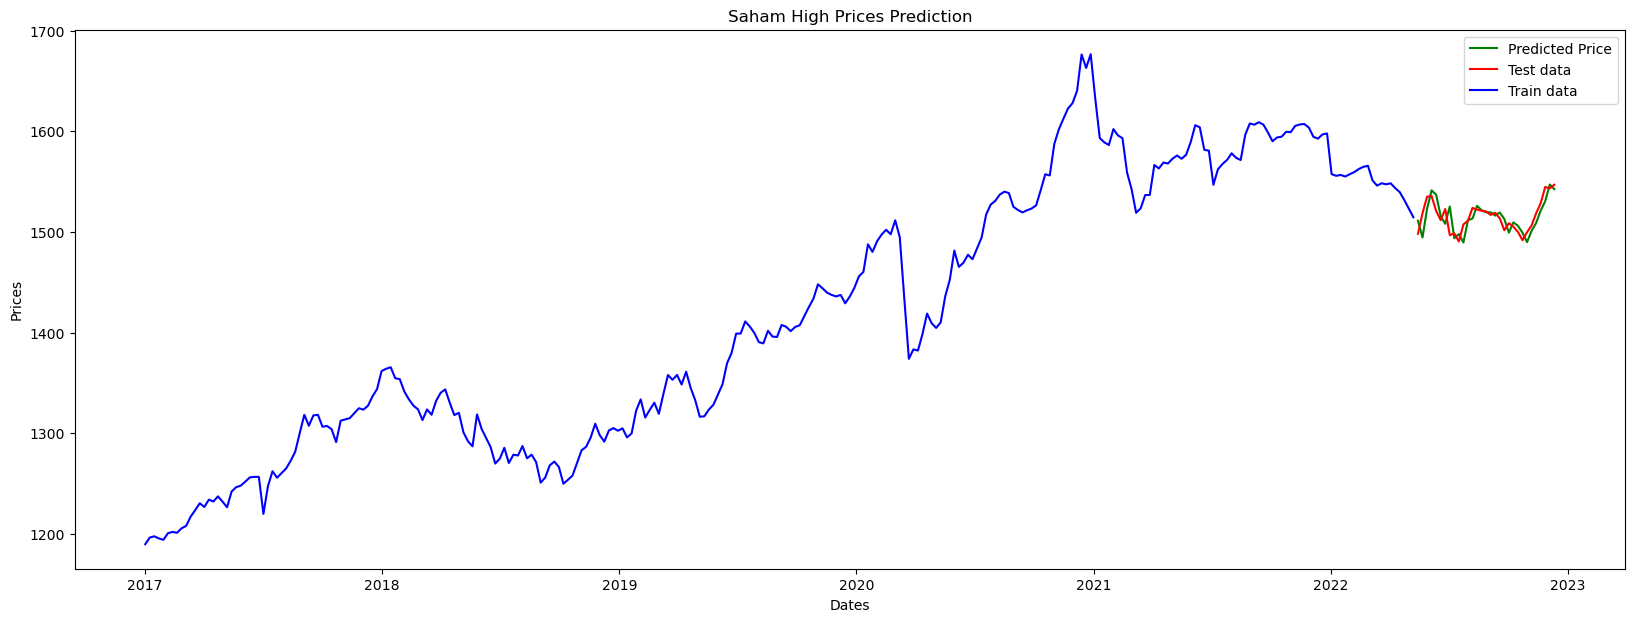

In [24]:
plt.figure(figsize=(20,7))

plt.plot(test_data.index, predictions_High, color='green', label='Predicted Price')
plt.plot(test_data.index, test_data["High"], color='red', label='Test data')
plt.plot(train_data.index, train_data["High"], color='blue', label='Train data')
plt.title('Saham High Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

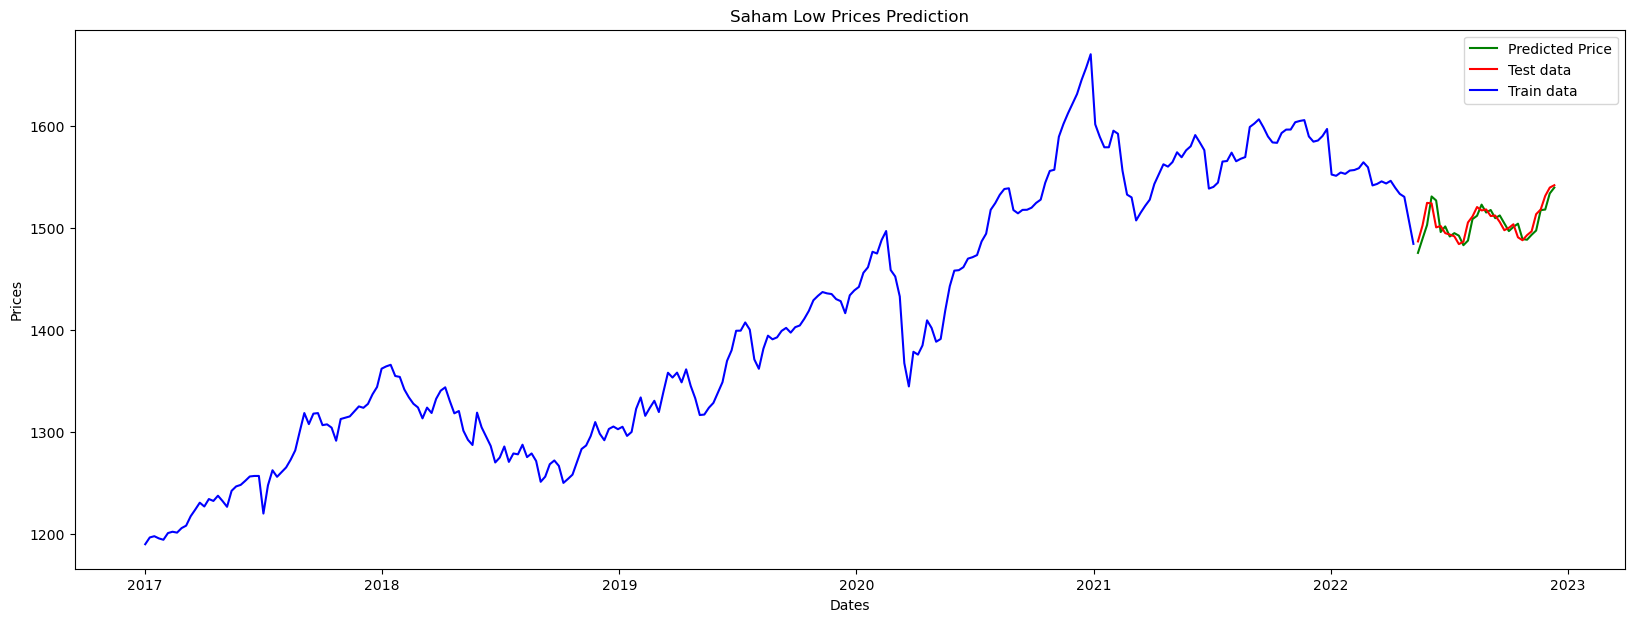

In [25]:
plt.figure(figsize=(20,7))

plt.plot(test_data.index, predictions_Low, color='green', label='Predicted Price')
plt.plot(test_data.index, test_data["Low"], color='red', label='Test data')
plt.plot(train_data.index, train_data["Low"], color='blue', label='Train data')
plt.title('Saham Low Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

In [26]:
# High

actual_High=pd.DataFrame()
actual_High=pd.DataFrame(test_ar_High,columns=["Actual_High"])
predicted_High=pd.DataFrame(list(predictions_High),columns=["Predicted_High"])
actual_High=actual_High.reset_index(drop=True)
predicted_High=predicted_High.reset_index(drop=True)
output_High=pd.concat([actual_High,predicted_High],axis=1)

# Low

actual_Low=pd.DataFrame()
actual_Low=pd.DataFrame(test_ar_Low,columns=["Actual_Low"])
predicted_Low=pd.DataFrame(list(predictions_Low),columns=["Predicted_Low"])
actual_Low=actual_Low.reset_index(drop=True)
predicted_Low=predicted_Low.reset_index(drop=True)
output_Low=pd.concat([actual_Low,predicted_Low],axis=1)

output = pd.concat([output_High, output_Low], axis=1)
output

,Actual_High,Predicted_High,Actual_Low,Predicted_Low
0,1498.26,1511.246335,1486.56,1475.310657
1,1518.67,1494.532459,1502.15,1489.119459
2,1535.03,1522.974818,1524.37,1502.642997
3,1535.67,1541.401209,1523.87,1530.677160
4,1520.87,1537.117417,1500.35,1526.726761
5,1511.81,1515.790235,1501.65,1495.774462
6,1522.76,1508.155345,1494.69,1501.270512
7,1496.82,1525.355904,1493.27,1491.384802
8,1498.53,1493.711702,1491.59,1494.677603
9,1490.54,1497.881063,1483.94,1492.213371


In [27]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [28]:
# High

MEAN_High = new_df['High'].mean()
MAE_High = mean_absolute_error(output['Actual_High'], output['Predicted_High'])
MSE_High = mean_squared_error(output['Actual_High'], output['Predicted_High'])
RMSE_High = np.sqrt(mean_squared_error(output['Actual_High'], output['Predicted_High']))
MAPE_High = mean_absolute_percentage_error(output['Actual_High'], output['Predicted_High'])

# Low

MEAN_Low = new_df['Low'].mean()
MAE_Low = mean_absolute_error(output['Actual_Low'], output['Predicted_Low'])
MSE_Low = mean_squared_error(output['Actual_Low'], output['Predicted_Low'])
RMSE_Low = np.sqrt(mean_squared_error(output['Actual_Low'], output['Predicted_Low']))
MAPE_Low = mean_absolute_percentage_error(output['Actual_Low'], output['Predicted_Low'])

In [29]:
nilai = [MEAN_High,MAE_High,MSE_High,RMSE_High,MAPE_High,MEAN_Low,MAE_Low,MSE_Low,RMSE_Low,MAPE_Low]
MEAN = []
MAE = []
MSE = []
RMSE = []
MAPE = []
for i in nilai:
    MEAN.append(MEAN_High)
    MAE.append(MAE_High)
    MSE.append(MSE_High)
    RMSE.append(RMSE_High)
    MAPE.append(MAPE_High)
    MEAN.append(MEAN_Low)
    MAE.append(MAE_Low)
    MSE.append(MSE_Low)
    RMSE.append(RMSE_Low)
    MAPE.append(MAPE_Low)
predict = ['High','Low']
score = pd.DataFrame(predict)
score.rename(columns={0:'Predict'},inplace = True)
score['MEAN']= (MEAN_High,MEAN_Low)
score['MAE']= (MAE_High,MAE_Low)
score['MSE']= (MSE_High,MSE_Low)
score['RMSE']=(RMSE_High,RMSE_Low)
score['MAPE']=(MAPE_High,MAPE_Low)

score

,Predict,MEAN,MAE,MSE,RMSE,MAPE
0,High,1425.602386,8.664169,117.580738,10.843465,0.005723
1,Low,1419.646705,7.546537,95.249164,9.759568,0.005007


## **7. Prediction**

In [30]:
# Create date for the predicted month
index_new = pd.DataFrame(pd.date_range('2022-12-18', periods=4, freq='W').to_period('D'), columns=['Date'])
index_new = pd.DataFrame(index_new['Date'].dt.to_timestamp(freq='W'))
index_new

,Date
0,2022-12-18
1,2022-12-25
2,2023-01-01
3,2023-01-08


In [31]:
# High

result_High =  model_High.fit()
  
# Forecast for the next 4 week
forecast_High = result_High.predict(start = len(new_df), 
                          end = (len(new_df)-1) + 4, 
                          typ = 'levels')

forecast_High = pd.concat([index_new.reset_index(drop=True), pd.DataFrame(forecast_High,columns=["Forecast"])], axis=1).set_index(["Date"])
forecast_High

,Forecast
Date,
2022-12-18,1540.742492
2022-12-25,1539.364779
2023-01-01,1538.844602
2023-01-08,1538.836303


In [32]:
# Low

result_Low =  model_Low.fit()
  
# Forecast for the next 4 week
forecast_Low = result_Low.predict(start = len(new_df), 
                          end = (len(new_df)-1) + 4, 
                          typ = 'levels')

forecast_Low = pd.concat([index_new.reset_index(drop=True), pd.DataFrame(forecast_Low,columns=["Forcast"])], axis=1).set_index(["Date"])
forecast_Low

,Forcast
Date,
2022-12-18,1538.398393
2022-12-25,1537.564446
2023-01-01,1536.347221
2023-01-08,1535.714178


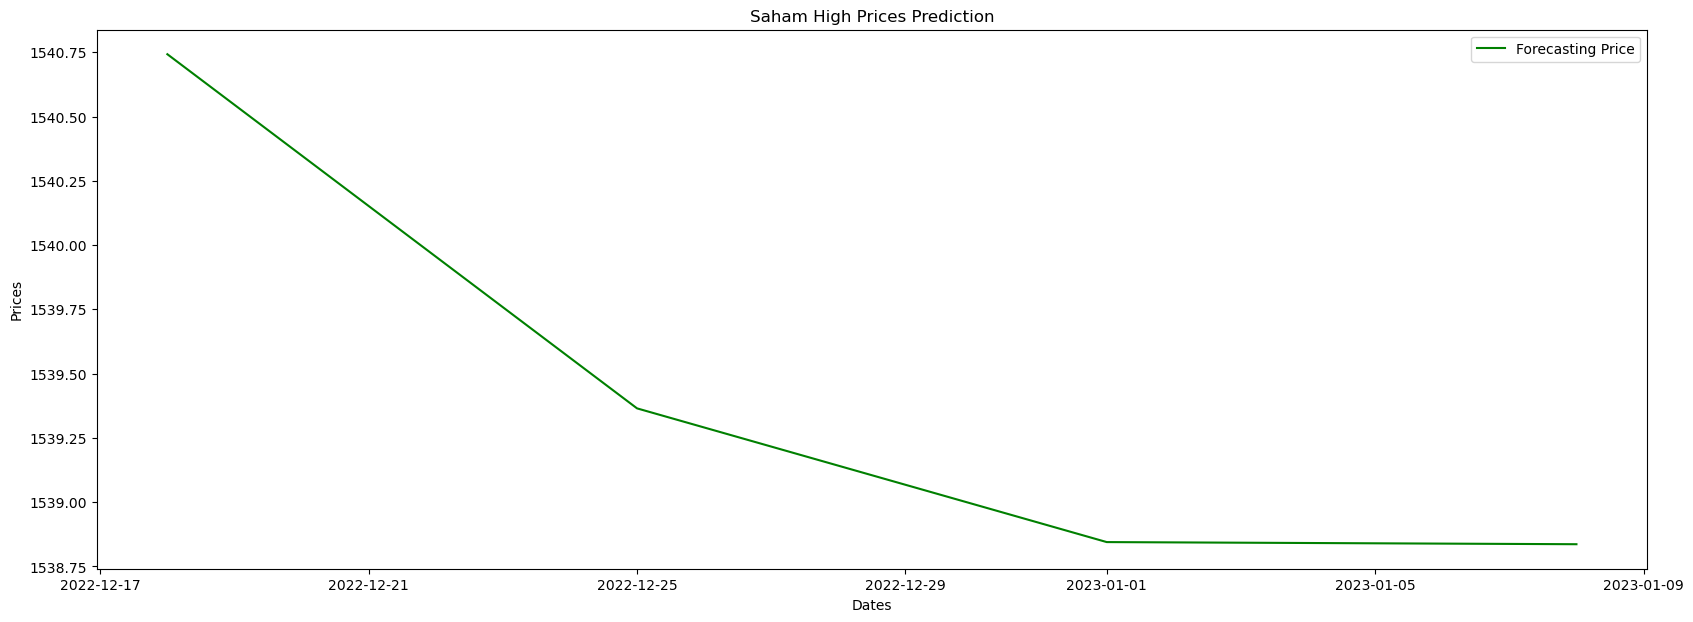

In [33]:
plt.figure(figsize=(20,7))
plt.plot(forecast_High, color='green', label='Forecasting Price')
plt.title('Saham High Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

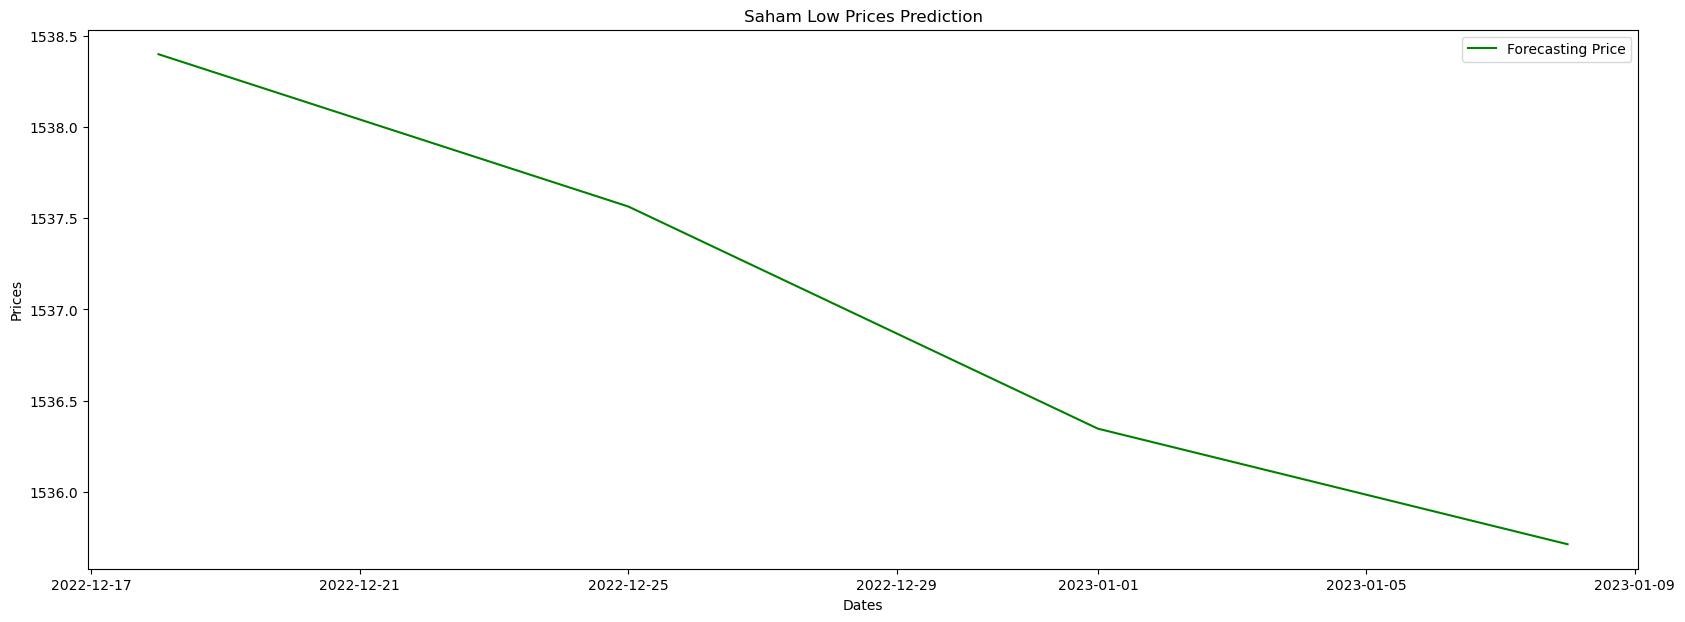

In [34]:
plt.figure(figsize=(20,7))
plt.plot(forecast_Low, color='green', label='Forecasting Price')
plt.title('Saham Low Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()